# <font color=red> 2.Proje-Yengeç Yaşı ve Özellikleri </font>

<img src="crabb.jpg">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
import scipy
import math
import plotly.express as px
import statsmodels.api as sm

In [3]:
pip install kaggle

     ---------------------------------------- 83.6/83.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110697 sha256=c041b04b55443dc3ec3cbd84e0b403d8f86932481c775da285b4804105e99d7b
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\b2\3d\88\839f363f3ce6b71785b8a95627cd52cb5359e54aba76a7ab76
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [55]:
!mkdir-/.kaggle

'mkdir-' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import kaggle

In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [4]:
api= KaggleApi()
api.authenticate()

In [5]:
api.competition_download_file("playground-series-s3e16",
                             "train.csv")

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile

# Sıkıştırılmış dosyayı çıkartma
with zipfile.ZipFile("train.csv.zip", "r") as zip_ref:
    zip_ref.extractall()

# "train.csv" dosyasını DataFrame olarak okuma
df = pd.read_csv("train.csv")

## <font color=red> Veri İnceleme ve Düzenleme: </font>

In [7]:
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


Bu veri seti, yengeçlerin biyolojik özelliklerini ve ölçümlerini içerir. İşte her bir sütunun anlamı:

1. **id:** Her yengeç örneğinin benzersiz bir kimlik numarasını temsil eder. Veri seti içindeki her bir yengecin ayrı bir kimlik numarası vardır.

2. **Sex:** Yengeçlerin cinsiyetini belirtir. "I" (Infant), "M" (Mature), ve "F" (Female) cinsiyetlerini temsil eder. Yani yengeçlerin yaş, cinsiyet ve üreme durumlarını gösterir.

3. **Length:** Yengeçlerin uzunluğunu milimetre cinsinden ölçer. Bu sütun yengeçlerin boyutları hakkında bilgi verir.

4. **Diameter:** Yengeçlerin çapını milimetre cinsinden ölçer. Genellikle kabuk çapını ifade eder ve yengeç boyutuyla ilgili bir başka ölçümdür.

5. **Height:** Yengeçlerin yüksekliğini milimetre cinsinden ölçer. Bu, yengeç kabuğunun yüksekliğini ifade eder.

6. **Weight:** Yengeçlerin toplam ağırlığını gram cinsinden ölçer. Bu sütun, yengeçlerin genel ağırlığını temsil eder.

7. **Shucked Weight:** Yengeçlerin soyulmuş et ağırlığını gram cinsinden ölçer. Yengeç kabuğundan ayrılmış etin ağırlığını ifade eder.

8. **Viscera Weight:** Yengeçlerin iç organ ağırlığını gram cinsinden ölçer. İç organların ağırlığını ifade eder.

9. **Shell Weight:** Yengeçlerin kabuk ağırlığını gram cinsinden ölçer. Kabukun ağırlığını ifade eder.

10. **Age:** Yengeçlerin yaşını yıl cinsinden belirtir.

Bu veri seti, yengeçlerin farklı biyolojik özelliklerini ve yaşlarını içerdiği için deniz bilimleri, biyoloji ve çevre bilimleri gibi alanlarda kullanılabilir. Veri analizi ve görselleştirmesi, yengeç popülasyonunun yapısını, büyüme eğilimlerini ve cinsiyet dağılımını incelemek için kullanılabilir. Ayrıca, yengeçlerin yaşları ile diğer özellikler arasındaki ilişkileri de araştırmak için kullanılabilir.

In [8]:
df.shape

(74051, 10)

In [9]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [10]:
df.corr()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,1.000000,0.000165,0.000290,0.000967,-0.000910,-0.000801,-0.000640,-0.000816,0.000089
Length,0.000165,1.000000,0.989437,0.918352,0.936374,0.915516,0.917855,0.916957,0.612843
Diameter,0.000290,0.989437,1.000000,0.921353,0.938249,0.914199,0.918351,0.922688,0.621256
Height,0.000967,0.918352,0.921353,1.000000,0.901775,0.864083,0.883127,0.903398,0.638067
Weight,-0.000910,0.936374,0.938249,0.901775,1.000000,0.971267,0.971062,0.965525,0.601195
Shucked Weight,-0.000801,0.915516,0.914199,0.864083,0.971267,1.000000,0.942626,0.910398,0.503320
Viscera Weight,-0.000640,0.917855,0.918351,0.883127,0.971062,0.942626,1.000000,0.933919,0.576808
Shell Weight,-0.000816,0.916957,0.922688,0.903398,0.965525,0.910398,0.933919,1.000000,0.663473
Age,0.000089,0.612843,0.621256,0.638067,0.601195,0.503320,0.576808,0.663473,1.000000


In [11]:
df.corr()['Age'].sort_values(ascending=False)

Age               1.000000
Shell Weight      0.663473
Height            0.638067
Diameter          0.621256
Length            0.612843
Weight            0.601195
Viscera Weight    0.576808
Shucked Weight    0.503320
id                0.000089
Name: Age, dtype: float64

In [12]:
df.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


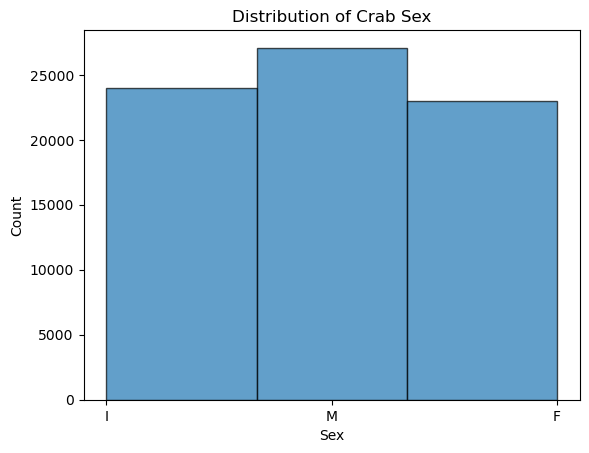

In [14]:
plt.hist(df['Sex'], bins=3, edgecolor='k', alpha=0.7)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Crab Sex')
plt.show()

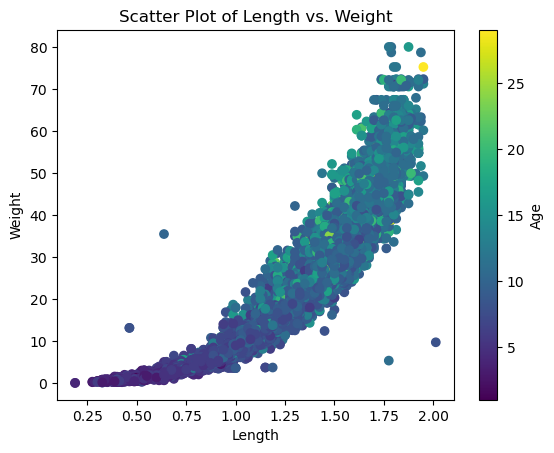

In [15]:
plt.scatter(df['Length'], df['Weight'], c=df['Age'], cmap='viridis')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.colorbar(label='Age')
plt.title('Scatter Plot of Length vs. Weight')
plt.show()

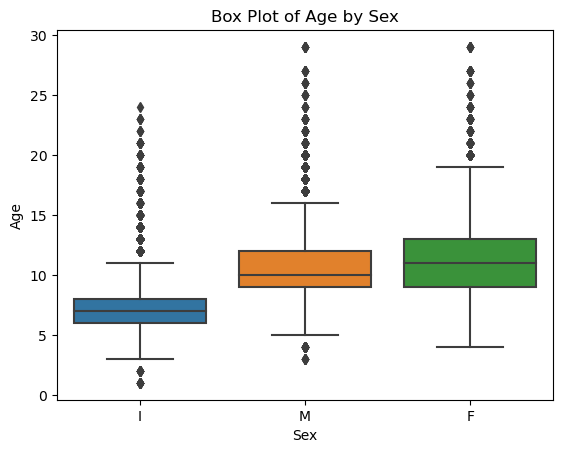

In [16]:
sns.boxplot(x='Sex', y='Age', data=df)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Box Plot of Age by Sex')
plt.show()

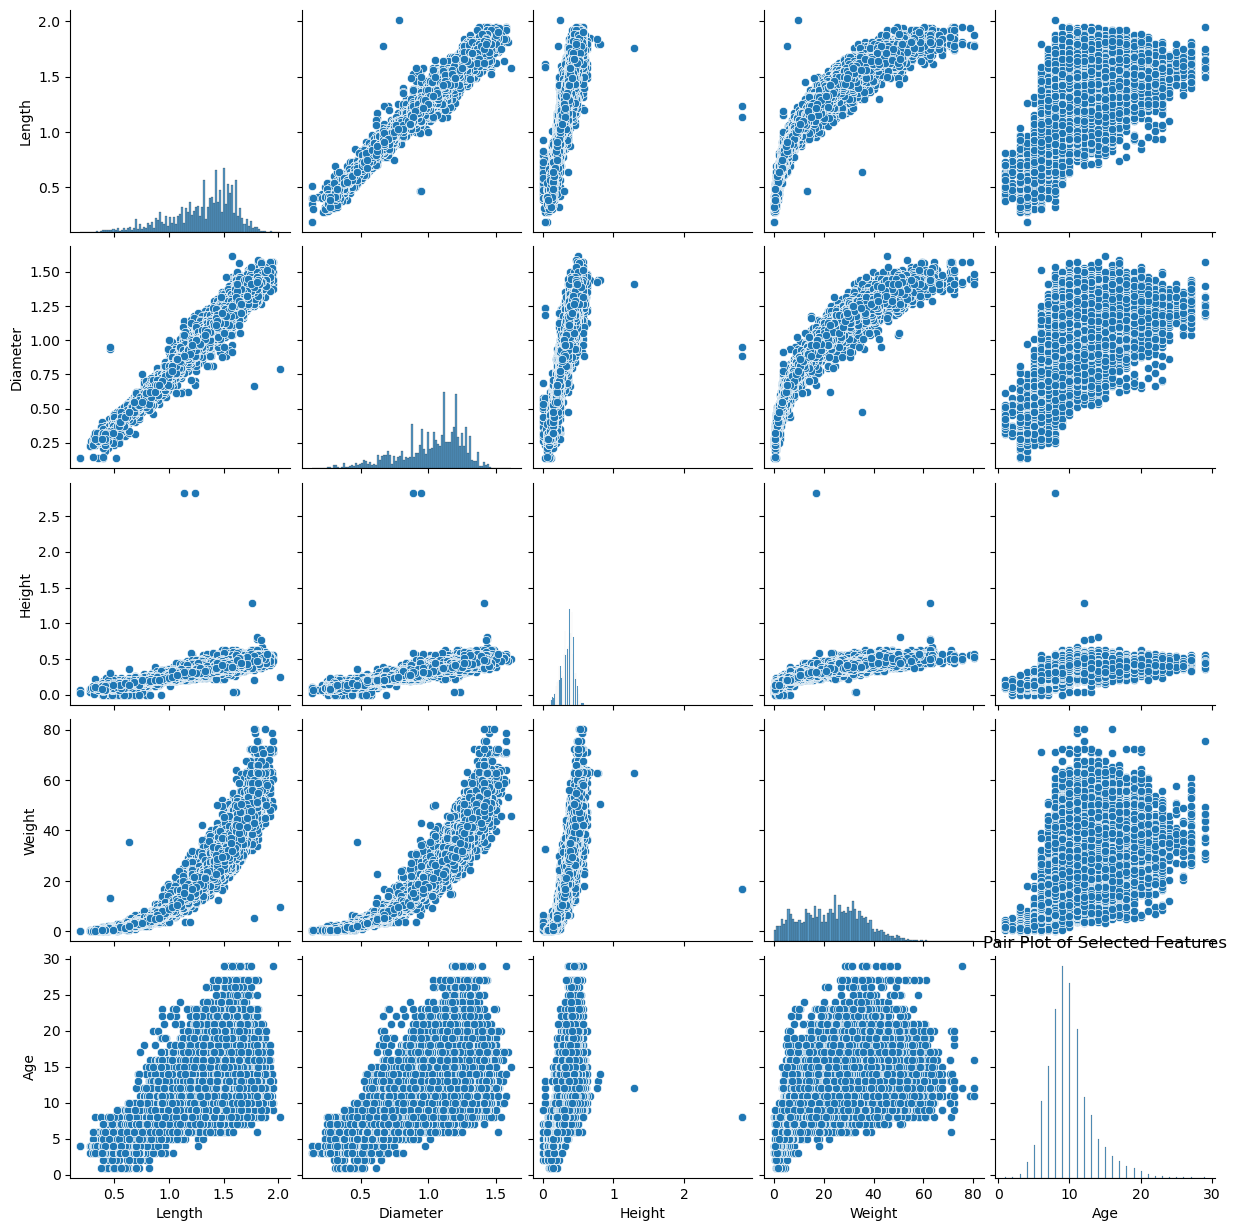

In [17]:
sns.pairplot(df[['Length', 'Diameter', 'Height', 'Weight', 'Age']])
plt.title('Pair Plot of Selected Features')
plt.show()

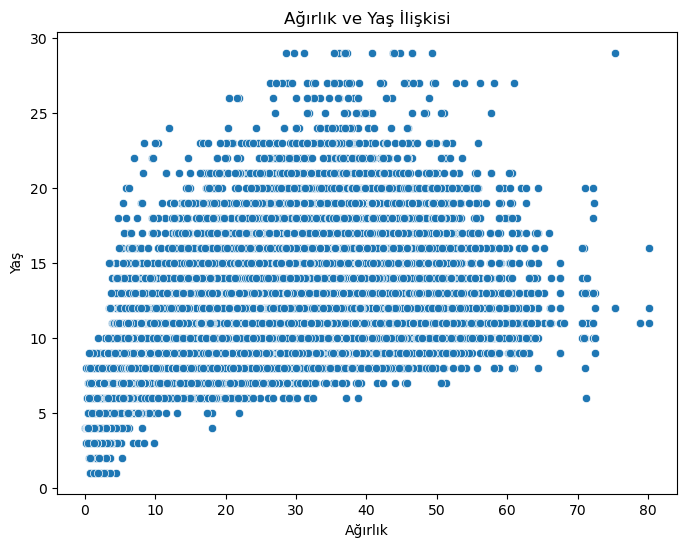

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight', y='Age', data=df)
plt.title('Ağırlık ve Yaş İlişkisi')
plt.xlabel('Ağırlık')
plt.ylabel('Yaş')
plt.show()

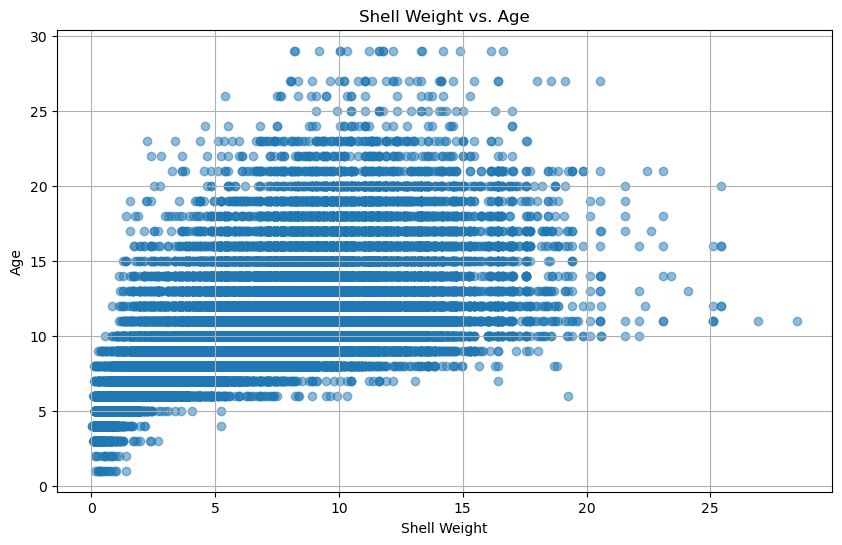

In [19]:
# Shell Weight ve Age arasındaki dağılım grafiği
plt.figure(figsize=(10, 6))
plt.scatter(df['Shell Weight'], df['Age'], alpha=0.5)
plt.title('Shell Weight vs. Age')
plt.xlabel('Shell Weight')
plt.ylabel('Age')
plt.grid(True)
plt.show()

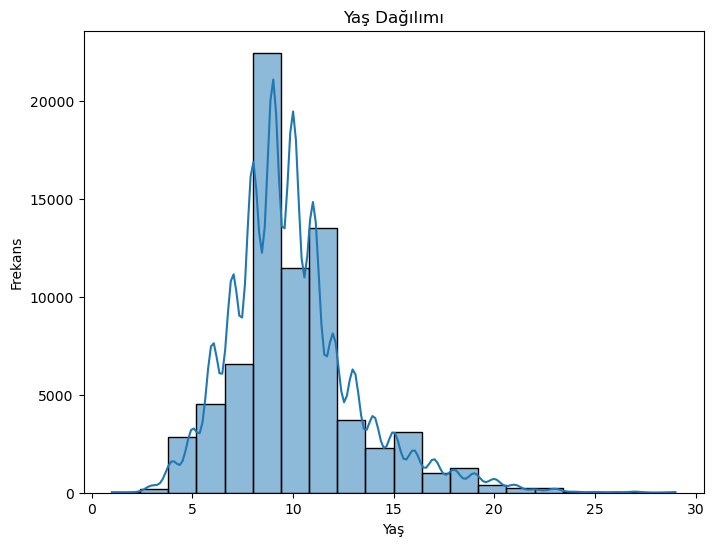

In [87]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show()

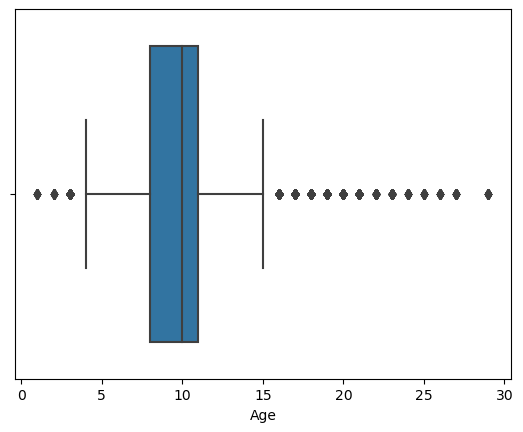

In [20]:
sns.boxplot(x=df["Age"]);

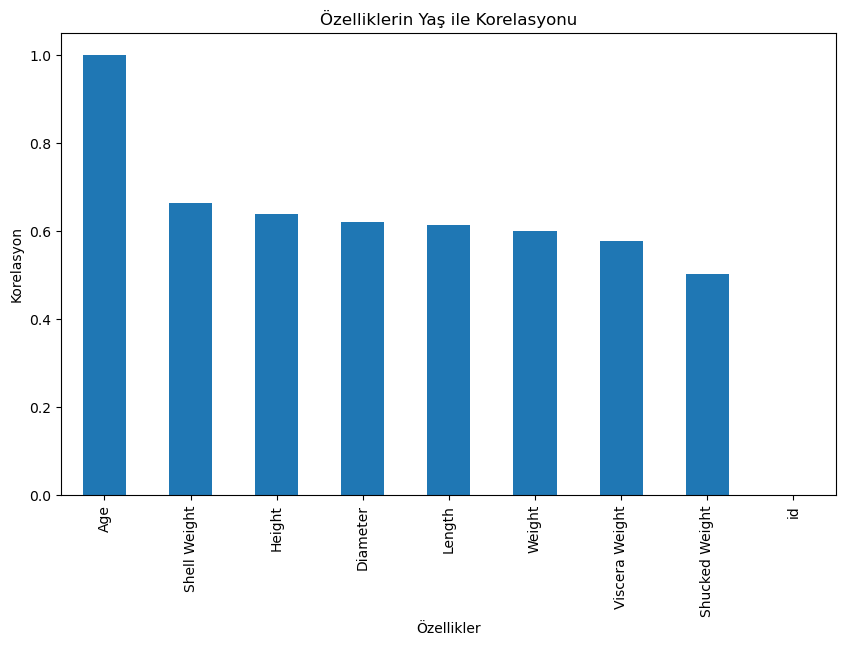

In [21]:
#Korelasyon sıralamasını al
correlation_age = df.corr()['Age'].sort_values(ascending=False)

# Korelasyon sıralamasını çubuk grafik olarak görselleştir
plt.figure(figsize=(10, 6))
correlation_age.plot(kind='bar')
plt.title('Özelliklerin Yaş ile Korelasyonu')
plt.xlabel('Özellikler')
plt.ylabel('Korelasyon')
plt.show()

In [22]:
df = df.drop(columns=['id'])

In [23]:
df['Sex'].value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

## <font color=red> Modelleme: </font>

In [24]:
# 'Cinsiyet' sütununu get_dummies ile dönüştürme
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# drop_first=True parametresi ile ilk kategoriyi (diğer kategori için) düşürdük

In [25]:
x = df.drop(columns=["Age"])
y = df["Age"]

In [1]:
def fnc_all_regression_models(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [27]:
fnc_all_regression_models(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.582525,2.062698,1.429124
LinearRegression,0.556981,2.124866,1.488617
Ridge,0.556948,2.124946,1.488652
KNeighborsRegressor,0.518740,2.214676,1.541246
ElasticNet,0.461309,2.343098,1.658911
Lasso,0.400449,2.471915,1.763557
ExtraTreeRegressor,0.143469,2.954554,1.982783


## <font color=red> Test Dosyasını Tahmin: </font>

In [30]:
import os
import zipfile

# Test.csv dosyasını indirin ve unzip edin
api.competition_download_file("playground-series-s3e16", "test.csv")

# İndirilen ZIP dosyasının adı
zip_file_name = 'test.csv.zip'

# Çıkartma hedef klasörü
extracted_folder = 'test_data'

# ZIP dosyasını çıkartma
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Çıkartılan dosyaları listeleme
extracted_files = os.listdir(extracted_folder)
print("Çıkartılan dosyalar:")
for file in extracted_files:
    print(file)

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Çıkartılan dosyalar:
test.csv


In [31]:
dftest = pd.read_csv(os.path.join(extracted_folder, 'test.csv'))

In [32]:
dftest.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [33]:
dftest = dftest.drop(columns=['id'])

In [34]:
dftest['Age'] = None

In [35]:
dftest.shape

(49368, 9)

In [36]:
dftest.isnull().sum()

Sex                   0
Length                0
Diameter              0
Height                0
Weight                0
Shucked Weight        0
Viscera Weight        0
Shell Weight          0
Age               49368
dtype: int64

In [37]:
dftest["Sex"].value_counts()

M    17923
I    15963
F    15482
Name: Sex, dtype: int64

In [38]:
# 'Cinsiyet' sütununu get_dummies ile dönüştürme
dftest = pd.get_dummies(dftest, columns=['Sex'], drop_first=True)

# drop_first=True parametresi ile ilk kategoriyi (diğer kategori için) düşürdük

In [41]:
# İlk veri dosyasının başlığını görüntüle
print("İlk Veri Dosyasının Başlığı:")
print(df.head())

# İkinci veri dosyasının başlığını görüntüle
print("\nİkinci Veri Dosyasının Başlığı:")
print(dftest.head())

İlk Veri Dosyasının Başlığı:
   Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0  1.5250    1.1750  0.3750  28.973189       12.728926        6.647958   
1  1.1000    0.8250  0.2750  10.418441        4.521745        2.324659   
2  1.3875    1.1125  0.3750  24.777463       11.339800        5.556502   
3  1.7000    1.4125  0.5000  50.660556       20.354941       10.991839   
4  1.2500    1.0125  0.3375  23.289114       11.977664        4.507570   

   Shell Weight  Age  Sex_I  Sex_M  
0      8.348928    9      1      0  
1      3.401940    8      1      0  
2      6.662133    9      0      1  
3     14.996885   11      0      0  
4      5.953395    8      1      0  

İkinci Veri Dosyasının Başlığı:
   Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0  1.0500    0.7625  0.2750   8.618248        3.657085        1.729319   
1  1.1625    0.8875  0.2750  15.507176        7.030676        3.246018   
2  1.2875    0.9875  0.3250  14.571643        5.5

In [42]:
from sklearn.linear_model import LinearRegression

# Bağımsız değişkenleri ve hedef değişkeni ayırın
X_train = df.drop(columns=['Age'])
y_train = df['Age']

# Modeli oluşturun ve eğitin
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# Tahminleri yapın
X_test = dftest.drop(columns=['Age'])  # Tahmin için "Age" sütununu kaldırın
test_predictions = model.predict(X_test)

# Tahminleri "Age" sütununa ekleyin
dftest['Age'] = test_predictions

In [44]:
dftest.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_I,Sex_M
0,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,7.735472,1,0
1,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,7.682365,1,0
2,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,10.432966,0,0
3,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676,9.556131,0,0
4,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066,7.504141,1,0


### "Feature Importance" (Öznitelik Önemi)
Seçilen bir modelin belirli özelliklerin (bağımsız değişkenlerin) hedef değişkeni (bağımlı değişken) tahmin etmedeki katkısını ölçen bir kavramdır. Makine öğrenimi modelleri, özelliklerin sırasıyla sıralanmış bir önem derecesi listesi sağlar. Önemli özellikler, modelin hedef değişkeni tahmin etmedeki performansını daha fazla etkilerken, önemsiz özelliklerin etkisi daha azdır veya hiç yoktur.

In [ ]:
model.coef_

In [ ]:
fi=pd.DataFrame()

In [ ]:
fi["Features"]=x.columns

In [ ]:
fi['Coefficient']=model.coef_.reshape(86)

In [ ]:
fi.head()

In [ ]:
fi=fi.sort_values(by="Coefficient", ascending=False)

In [ ]:
plt.figure(figsize=(6,15))
plt.barh(fi['Features'],fi['Coefficient'])
plt.gca().invert_yaxis()

## Deep Learning

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Bağımsız değişkenleri ve hedef değişkeni ayırın
X = df.drop(columns=['Age'])
y = df['Age']

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi normalize edelim
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Yapay Sinir Ağı (Neural Network) Modeli Oluşturma
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Çıkış katmanı, yaş tahminini yapacak
])

# Modeli Derleme
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli Eğitme
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Modeli Test Etme
test_predictions = model.predict(X_test)

# Tahminleri bir DataFrame'e ekleyin
y_test = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame({'Gerçek Yaş': y_test, 'Tahmini Yaş': test_predictions.flatten()})

# Tahmin sonuçlarını görüntüle
print(predictions_df.head())

In [ ]:
from tensorflow.keras.models import Sequential #arka arkaya dizi şeklinde ekleme kısmı
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam',metrics='mse')

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1500,batch_size=128,verbose=1)

In [ ]:
model.summary()

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
tahmin=model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(tahmin,y_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
(mean_squared_error(y_test,tahmin))**0.5

In [ ]:
#tahmin ettiğimiz değer ile gerçek değerin grafiği
fig=plt.figure(figsize=(10,5))
plt.scatter(y_test,tahmin)
plt.plot(y_test,y_test,'r')